In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_pickle('data/df_TSLA.pkl')
df.sample(10)

,open_,high_,low_,close_,volume_
timestamp_,,,,,
2021-03-23 05:45:00,223.3033,223.3333,223.3033,223.3333,2088
2023-01-18 15:30:00,128.6500,128.7300,127.9900,128.0100,1521371
2023-02-28 09:05:00,210.7000,211.2700,210.7000,211.2000,73539
2023-02-13 14:30:00,194.1900,194.4700,193.5700,193.8650,1277375
2023-01-20 16:05:00,133.4200,133.5000,133.4000,133.4000,172013
2021-12-06 16:20:00,335.9700,336.1300,335.9667,336.1300,10374
2023-12-29 07:25:00,254.7500,254.9000,254.7100,254.7900,13498
2021-11-08 09:25:00,387.5000,387.6733,382.3367,383.0767,532902
2023-07-17 18:15:00,289.1700,289.6000,289.1100,289.3000,26316


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140010 entries, 2021-01-29 19:55:00 to 2021-10-01 04:00:00
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   open_    140010 non-null  float64
 1   high_    140010 non-null  float64
 2   low_     140010 non-null  float64
 3   close_   140010 non-null  float64
 4   volume_  140010 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 6.4 MB


In [4]:
df.isna().sum()

open_      0
high_      0
low_       0
close_     0
volume_    0
dtype: int64

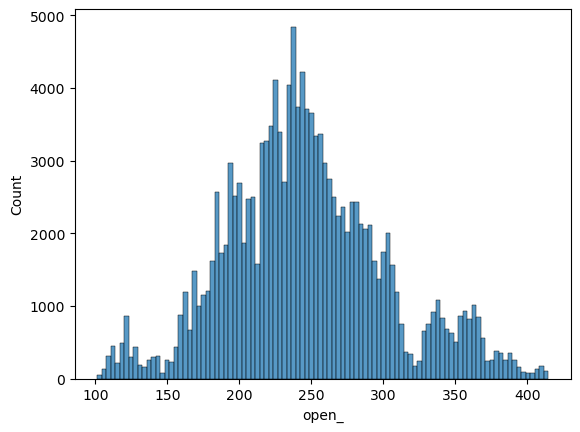

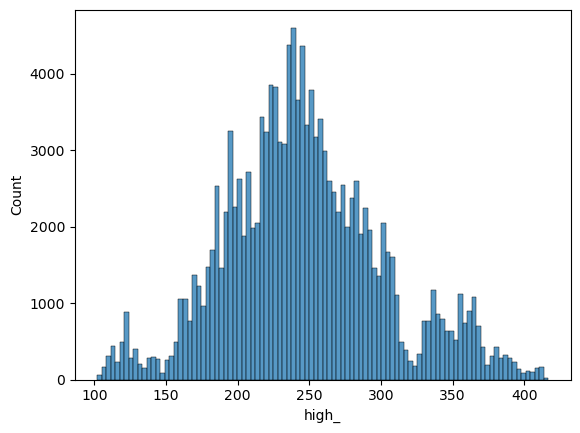

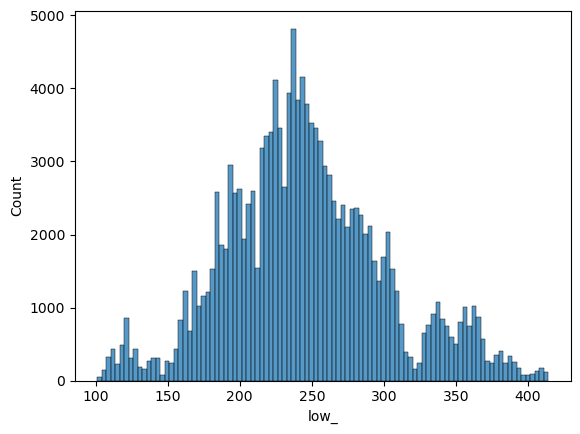

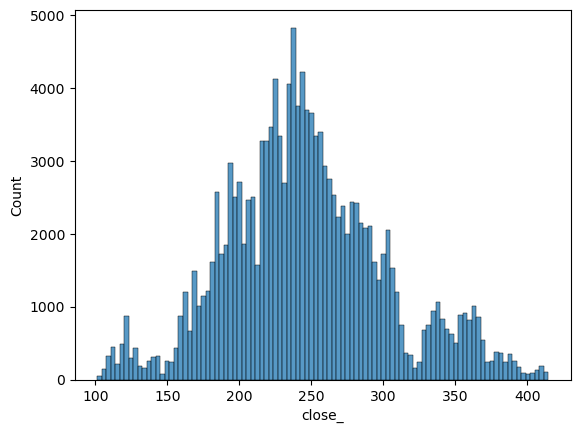

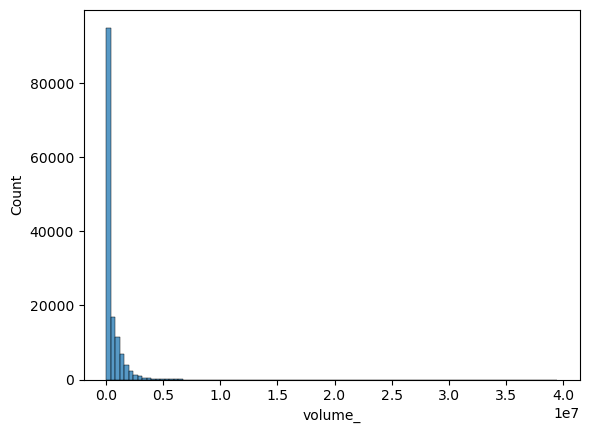

In [5]:
for col in df.columns:
    sns.histplot(df, x=col, bins=100)
    plt.show()

In [6]:
df['volume_'].describe()

count    1.400100e+05
mean     4.310662e+05
std      7.532043e+05
min      1.000000e+02
25%      7.071000e+03
50%      4.378350e+04
75%      6.096052e+05
max      3.949395e+07
Name: volume_, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=1)

#### Aгрегация по дням

In [8]:
train_test = train.copy()

In [9]:
ohlc_dict = {
    'open_': 'first',
    'high_': 'max',
    'low_': 'min',
    'close_': 'last',
    'volume_': 'sum'
}

train_test = train.resample('D').agg(ohlc_dict)

In [10]:
def aggregation(dataframe: pd.DataFrame, key: str = 'D') -> pd.DataFrame:
    agg_dict_ohlc = {
        'open_': 'first',
        'high_': 'max',
        'low_': 'min',
        'close_': 'last',
        'volume_': 'sum'
    }

    return dataframe.resample(key).agg(agg_dict_ohlc).dropna()

def resample_index(index: pd.DatetimeIndex, freq: str = 'D'):
    assert isinstance(index, pd.DatetimeIndex)
    start_date = index.min()
    end_date = index.max() + pd.DateOffset(days=1)
    resampled_index = pd.date_range(start_date, end_date, periods=freq)[:-1]
    series = pd.Series(resampled_index, resampled_index.floor('D'))

In [11]:
train_test.shape

(1090, 5)

In [12]:
train_test.isna().sum()

open_      337
high_      337
low_       337
close_     337
volume_      0
dtype: int64

In [13]:
train_test[train_test['open_'].isna()]

,open_,high_,low_,close_,volume_
timestamp_,,,,,
2021-01-09,NaN,NaN,NaN,NaN,0
2021-01-10,NaN,NaN,NaN,NaN,0
2021-01-16,NaN,NaN,NaN,NaN,0
2021-01-17,NaN,NaN,NaN,NaN,0
2021-01-18,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...
2023-12-16,NaN,NaN,NaN,NaN,0
2023-12-17,NaN,NaN,NaN,NaN,0
2023-12-23,NaN,NaN,NaN,NaN,0


In [14]:
train_test = train_test.dropna()

In [15]:
train = aggregation(train, key='D')
train.head(10)

,open_,high_,low_,close_,volume_
timestamp_,,,,,
2021-01-04,236.3333,248.1633,236.3333,244.5333,78918864
2021-01-05,244.7967,251.4667,239.7333,250.9333,45051375
2021-01-06,249.3333,258.0000,248.8867,254.5333,70871691
2021-01-07,256.3333,278.2400,255.7333,276.5000,64095783
2021-01-08,281.6667,294.9633,279.4633,289.1667,116668929
2021-01-11,288.7933,290.0000,268.3500,272.1200,85100898
2021-01-12,274.0000,289.3333,274.0000,284.0000,77786346
2021-01-13,286.4667,287.0000,277.3333,281.0333,52628691
2021-01-14,280.0000,287.4800,279.2200,282.6500,47979894


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-01-04 to 2023-12-29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open_    753 non-null    float64
 1   high_    753 non-null    float64
 2   low_     753 non-null    float64
 3   close_   753 non-null    float64
 4   volume_  753 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.3 KB


In [17]:
# import plotly.graph_objects as go
#
# fig = go.Figure(data=[go.Candlestick(x=train_daily.index,
#                                      open=train['open_'],
#                                      high=train['high_'],
#                                      low=train['low_'],
#                                      close=train['close_'])])
# fig.show()

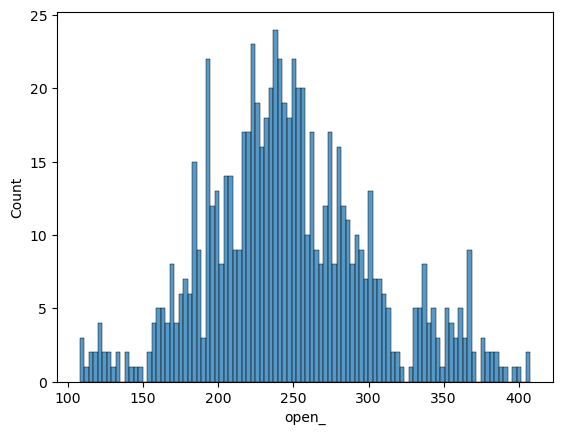

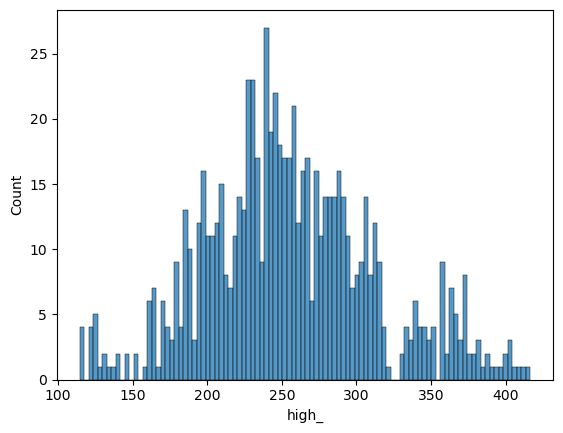

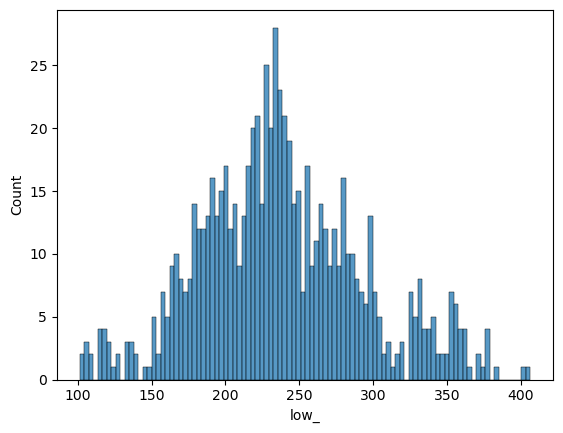

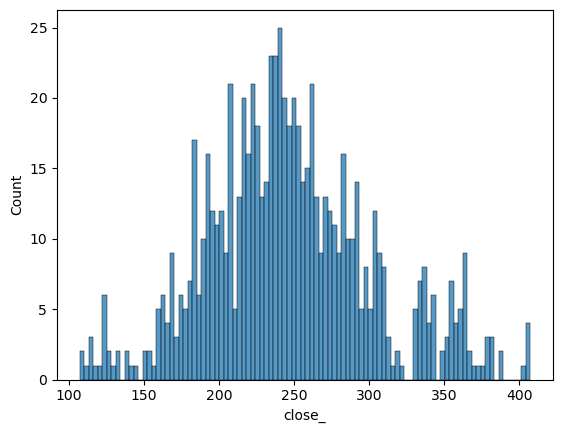

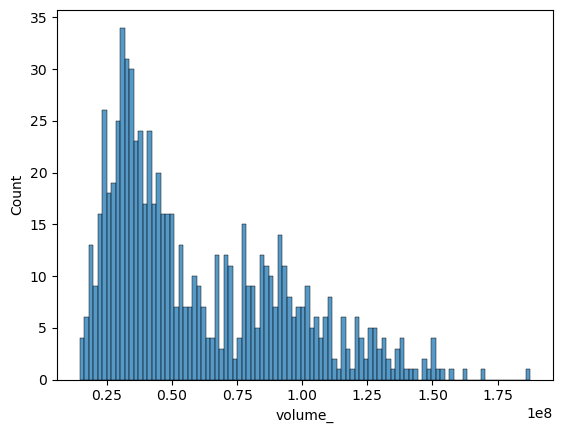

In [18]:
for col in train.columns:
    sns.histplot(train, x=col, bins=100)
    plt.show()

### Рассчет RSI

#### Ручные рассчеты

In [19]:
change = train_test['close_'] - train_test['close_'].shift(1)
change

timestamp_
2021-01-04        NaN
2021-01-05     6.4000
2021-01-06     3.6000
2021-01-07    21.9667
2021-01-08    12.6667
               ...   
2023-12-22    -2.6800
2023-12-26     4.3800
2023-12-27     5.6650
2023-12-28    -7.7650
2023-12-29    -6.4100
Name: close_, Length: 753, dtype: float64

In [20]:
U = np.where(change > 0, change, 0)
D = np.where(change < 0, -change, 0)

Расчитаем $EMA[N], N = 14$

In [21]:
n = 14
a = 2 / (n + 1)

In [22]:
EMA_U = np.zeros(len(U))
EMA_U[0] = U[0]
for i in range(1, len(U)):
    EMA_U[i] = U[i] * a + EMA_U[i-1] * (1 - a)
EMA_U

array([ 0.        ,  0.85333333,  1.21955556,  3.98584148,  5.14328928,
        4.45751738,  5.44718173,  4.72089083,  4.30699872,  3.73273222,
        4.06836793,  3.94147887,  3.41594835,  3.20538191,  3.91399765,
        4.0521313 ,  3.51184713,  3.44626751,  2.98676517,  4.90408982,
        5.93910451,  5.14722391,  4.46092739,  4.19013707,  3.91589213,
        3.39377318,  2.94127009,  2.63798074,  2.57736998,  2.23372065,
        2.03766456,  1.76597595,  1.53051249,  1.32644416,  1.43535827,
        2.1844305 ,  1.8931731 ,  1.90741669,  4.0619878 ,  3.52038942,
        3.05100417,  2.64420361,  2.29164313,  1.98609071,  7.15283862,
        6.1991268 ,  6.88101656,  5.96354769,  5.568848  ,  4.82633493,
        5.32238361,  4.61273246,  4.0705948 ,  4.29007549,  3.71806543,
        3.22232337,  3.17934692,  2.755434  ,  2.3880428 ,  3.45674376,
        4.07584459,  3.53239864,  4.54585216,  3.93973854,  3.41444007,
        3.60807472,  3.12699809,  3.79938501,  5.80792035,  5.03

In [23]:
EMA_D = np.zeros(len(D))
EMA_D[0] = D[0]
for i in range(1, len(D)):
    EMA_D[i] = D[i] * a + EMA_D[i-1] * (1 - a)
EMA_D

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       2.27289333, 1.96984089, 2.10275544, 1.82238805, 2.65406964,
       2.30019369, 1.9935012 , 2.16682104, 1.87791156, 1.62752336,
       1.41052024, 4.22334421, 3.66023165, 5.01886743, 4.3496851 ,
       3.76972709, 4.41465681, 4.09180924, 3.54623467, 3.07340338,
       3.30361626, 4.48490743, 3.88691977, 3.3686638 , 4.08084196,
       3.5367297 , 3.53672574, 3.10560231, 5.87285533, 5.08980796,
       4.4111669 , 7.08523798, 6.14053958, 5.32180097, 6.21222751,
       6.96171717, 8.35570155, 7.47406134, 7.76729316, 6.73165408,
       6.9296602 , 6.00570551, 5.44982477, 4.72318147, 5.33342394,
       4.62230075, 6.19178065, 5.36620989, 4.65071524, 4.39817988,
       5.01975589, 4.35045511, 4.71706109, 4.68811961, 4.063037  ,
       3.52129873, 3.23000557, 2.79933816, 2.4349864 , 3.00365488,
       2.60316757, 2.70051856, 2.34044942, 2.02838949, 2.87883089,
       2.49498678, 2.16898854, 2.61089673, 2.67433717, 2.31775

In [24]:
n_null_idx = np.nonzero(EMA_D)
RS = EMA_U[n_null_idx] / EMA_D[n_null_idx]
RS = np.concatenate((np.zeros(len(EMA_D) - len(RS)), RS), axis=0)
RS

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.96116435,  2.76529021,  2.24509743,  2.36338179,  1.40641834,
        1.76870667,  1.97716404,  1.57647923,  1.7068865 ,  2.40487956,
        2.87279202,  0.8315323 ,  0.94154355,  0.59510741,  1.12745859,
        1.57547333,  1.16593976,  1.09020903,  1.18157354,  1.27412241,
        1.02729037,  0.65581512,  0.67868155,  0.76510157,  0.54736759,
        0.57614371,  0.4993251 ,  0.49282308,  0.22586018,  0.28200637,
        0.49520468,  0.26719965,  0.31062689,  0.76327315,  0.56668714,
        0.43825454,  0.31645501,  0.30661283,  0.25569921,  1.06256776,
        0.89457876,  1.14574658,  1.09426412,  1.17904595,  0.90492243,
        1.15145766,  0.74497672,  0.75856049,  0.92245499,  0.84536457,
        0.6419283 ,  0.73080789,  0.58414211,  0.5093818 ,  0.85077831,
        1.15748333,  1.09361999,  1.62390247,  1.61797147,  1.13676178,
        1.38603245,  1.15792505,  1.62335703,  2.86331613,  1.74

In [25]:
RSI = 100 - 100/(1 + RS)
RSI

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       66.22950024, 73.44162219, 69.18428426, 70.26802003, 58.4444657 ,
       63.88205334, 66.41098751, 61.18734477, 63.05718773, 70.63038553,
       74.17883547, 45.40090831, 48.4945883 , 37.30829683, 52.99555975,
       61.17218584, 53.83066427, 52.15789499, 54.16152699, 56.0269933 ,
       50.67307502, 39.60678397, 40.42944005, 43.34603656, 35.37411511,
       36.55400864, 33.30332449, 33.01282555, 18.42462812, 21.99726752,
       33.11952459, 21.08583674, 23.70063436, 43.28728937, 36.17104679,
       30.47127812, 24.0384219 , 23.46623468, 20.36309385, 51.51674444,
       47.21781838, 53.39617419, 52.25053076, 54.10835652, 47.50442399,
       53.51988476, 42.69264531, 43.13530829, 47.98317754, 45.81016575,
       39.09600073, 42.22351276, 36.87435005, 33.74771039, 45.96867741,
       53.64969986, 52.23584   , 61.88882741, 61.80248675, 53.20021116,
       58.08942166, 53.65918763, 61.88090343, 74.11550161, 63.61

#### Полученные функции

In [26]:
def _calc_wma(dataframe: pd.DataFrame, n: int = 14, _key: str = 'close_') -> pd.DataFrame:
    data = dataframe.copy()

    wma = np.zeros(data.shape[0]) + np.nan

    for i in range(n):
        wma[i] = data[_key].iloc[:i].mean()

    weights = np.arange(1, n + 1, 1)
    for i in range(n - 1, data.shape[0]):
        vector = data[_key].iloc[i - n + 1: i + 1]
        vector = weights * vector
        wma[i] = (vector.sum())/(weights.sum())

    return wma

def calc_wma(dataframe: pd.DataFrame, n: int = 14, _key: str = 'close_') -> pd.DataFrame:

    data = dataframe.copy()
    wma = np.zeros(data.shape[0]) + np.nan

    for i in range(n):
        wma[i] = data[_key].iloc[:i].mean()

    weights = np.arange(1, n + 1, 1)
    for i in range(n - 1, data.shape[0]):
        vector = data[_key].iloc[i - n + 1: i + 1]
        vector = weights * vector
        wma[i] = (vector.sum())/(weights.sum())

    data[f'WMA_{_key[0]}_{str(n)}'] = wma
    return data

In [27]:
calc_wma(train).head(15)

,open_,high_,low_,close_,volume_,WMA_c_14
timestamp_,,,,,,
2021-01-04,236.3333,248.1633,236.3333,244.5333,78918864,NaN
2021-01-05,244.7967,251.4667,239.7333,250.9333,45051375,244.533300
2021-01-06,249.3333,258.0000,248.8867,254.5333,70871691,247.733300
2021-01-07,256.3333,278.2400,255.7333,276.5000,64095783,249.999967
2021-01-08,281.6667,294.9633,279.4633,289.1667,116668929,256.624975
2021-01-11,288.7933,290.0000,268.3500,272.1200,85100898,263.133320
2021-01-12,274.0000,289.3333,274.0000,284.0000,77786346,264.631100
2021-01-13,286.4667,287.0000,277.3333,281.0333,52628691,267.398086
2021-01-14,280.0000,287.4800,279.2200,282.6500,47979894,269.102488


В качестве метрики "цена" обычно понимается цена закрытия "close", так как она отражает окончательную цену за день или интервал времени, что считается важным показателем рыночных настроений.

In [28]:
def __calc_ema(x, last_ema, n):
    return (2 / (n + 1) * (x - last_ema)) + last_ema

def _calc_ema(vector: np.ndarray, n: int = 14) -> np.ndarray:
    ema = np.zeros(vector.shape[0]) + np.nan

    for i in range(1, n):
        ema[i] = vector[:i].mean()

    for i in range(n, vector.shape[0]):
        ema[i] = __calc_ema(vector[i], ema[i-1], n)

    return ema

def calc_ema(dataframe: pd.DataFrame, n: int = 14, _key: str = 'close_') -> pd.DataFrame:
    data = dataframe.copy()

    ema = np.zeros(data.shape[0]) + np.nan

    for i in range(n):
        ema[i] = data[_key].iloc[:i].mean()

    for i in range(n, data.shape[0]):
        ema[i] = __calc_ema(data[_key].iloc[i], ema[i-1], n)

    data[f'EMA_{_key[0]}_{str(n)}'] = ema

    return data

In [29]:
calc_ema(train).sample(6)

,open_,high_,low_,close_,volume_,EMA_c_14
timestamp_,,,,,,
2021-06-22,206.1333,209.5231,205.4067,208.0167,31657911,204.059635
2023-11-03,217.2600,231.7223,209.5212,219.9800,88494641,218.006106
2021-10-26,344.0000,364.9800,333.8133,337.9666,94003179,294.857520
2022-11-04,220.7900,223.8000,203.0800,209.0500,61727748,220.530770
2023-06-15,253.9500,264.3768,241.5539,253.5000,110924908,231.135710
2021-04-05,231.2767,238.9000,228.5834,230.9000,54103473,219.547326


In [30]:
def calc_rsi(dataframe: pd.DataFrame, n: int = 14, _key: str = 'close_') -> pd.DataFrame:

    data = dataframe.copy()

    change = data[_key].diff(1)
    u = np.where(change > 0, change, 0)
    d = np.where(change < 0, -change, 0)

    ema_u = _calc_ema(u, n)
    ema_d = _calc_ema(d, n)
    ema_d = np.where((ema_d == 0), np.nan, ema_d)

    rs = ema_u/ema_d
    rsi = 100 - 100 / (1 + rs)
    data[f'RSI_{_key[0]}_{str(n)}'] = rsi

    return data

In [31]:
calc_rsi(train)

,open_,high_,low_,close_,volume_,RSI_c_14
timestamp_,,,,,,
2021-01-04,236.3333,248.1633,236.3333,244.5333,78918864,NaN
2021-01-05,244.7967,251.4667,239.7333,250.9333,45051375,NaN
2021-01-06,249.3333,258.0000,248.8867,254.5333,70871691,NaN
2021-01-07,256.3333,278.2400,255.7333,276.5000,64095783,NaN
2021-01-08,281.6667,294.9633,279.4633,289.1667,116668929,NaN
...,...,...,...,...,...,...
2023-12-22,253.7000,258.2200,249.0350,252.5700,65747165,57.665269
2023-12-26,254.2700,273.4309,240.8791,256.9500,61766504,62.657538
2023-12-27,257.4500,271.9722,254.4300,262.6150,94496904,68.245792


In [32]:
train.sample(10)

,open_,high_,low_,close_,volume_
timestamp_,,,,,
2022-05-06,291.9667,296.6267,281.9367,288.0000,30178353
2022-04-07,351.8533,358.8633,340.5400,355.5000,32738343
2022-09-06,276.1400,276.1400,265.7400,273.8100,34449553
2022-09-20,308.4000,313.3300,305.5800,307.4000,29964471
2022-04-13,333.2267,342.0500,324.3657,341.0000,24030462
2022-10-03,249.1000,257.5200,241.2500,243.7000,50810608
2023-04-24,164.7200,165.2000,158.8500,161.6200,85353052
2023-11-13,213.7800,226.2800,206.9150,226.2800,98038267
2021-06-02,206.9967,207.7867,199.7133,200.7667,35771802


In [33]:
def calc_macd(dataframe: pd.DataFrame, n_fast: int = 12, n_slow: int = 26, _key: str = 'close_'):
    assert n_slow > n_fast

    data = dataframe.copy()

    ema_fast = _calc_ema(data[_key].to_numpy(), n_fast)
    ema_slow = _calc_ema(data[_key].to_numpy(), n_slow)

    data['MACD'] = ema_fast - ema_slow

    return data

In [34]:
calc_macd(train)

,open_,high_,low_,close_,volume_,MACD
timestamp_,,,,,,
2021-01-04,236.3333,248.1633,236.3333,244.5333,78918864,NaN
2021-01-05,244.7967,251.4667,239.7333,250.9333,45051375,0.000000
2021-01-06,249.3333,258.0000,248.8867,254.5333,70871691,0.000000
2021-01-07,256.3333,278.2400,255.7333,276.5000,64095783,0.000000
2021-01-08,281.6667,294.9633,279.4633,289.1667,116668929,0.000000
...,...,...,...,...,...,...
2023-12-22,253.7000,258.2200,249.0350,252.5700,65747165,5.377921
2023-12-26,254.2700,273.4309,240.8791,256.9500,61766504,5.652707
2023-12-27,257.4500,271.9722,254.4300,262.6150,94496904,6.255485


In [35]:
train = calc_ema(train)
train = calc_wma(train)
train = calc_rsi(train)
train = calc_macd(train)

In [36]:
train.sample(6)

,open_,high_,low_,close_,volume_,EMA_c_14,WMA_c_14,RSI_c_14,MACD
timestamp_,,,,,,,,,
2023-04-28,158.4800,165.0000,157.3200,164.2500,77427114,169.574041,166.281910,41.709481,-7.642583
2021-05-19,188.5600,189.2833,181.6667,186.0033,58064880,205.026589,200.198449,24.067440,-11.487011
2022-06-03,251.5000,260.3333,233.3333,233.4300,49635255,245.626891,239.311969,43.108720,-14.078587
2021-03-23,223.0000,227.2000,219.1700,220.3600,36470139,224.779697,222.969497,45.839144,-8.328805
2022-07-18,244.0033,250.5167,239.6867,241.3367,40921470,237.209223,237.652510,55.414098,-0.703482
2023-11-29,248.9500,258.0417,233.5087,245.3000,101892414,235.242638,238.092905,63.932085,3.715057


In [37]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

plot_data = train.copy().dropna()

fig.add_trace(go.Candlestick(x=plot_data.index,
                            open=plot_data['open_'].tolist(),
                            high=plot_data['high_'].tolist(),
                            low=plot_data['low_'].tolist(),
                            close=plot_data['close_'].tolist(),
                            name='OHLC'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=plot_data.index,
                         y=plot_data['EMA_c_14'],
                         name='EMA_c_14'),
              row=1, col=1)

fig.add_trace(go.Bar(x=plot_data.index,
                     y=plot_data['MACD'],
                     name='MACD',
                     marker={'color': 'orange'}
                     ),
              row=2, col=1)

fig.add_trace(go.Scatter(x=plot_data.index,
                         y=plot_data['RSI_c_14'],
                         name='RSI_c_14'),
              row=2, col=1)

fig.add_hline(y=50, row=2)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(dtick='M1', hoverformat='%d-%m-%Y', tickformat='%Y-%m', col=1)

fig.show()

https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D1%81%D0%B8%D0%BB%D1%8B

Есть отличная идея - посчитать коэффициент дивергенции, но для этого необходимо составить формулу. Коэффициент дивергенции - ялвятся одним из самых сильных методов технического анализа, а т. к. модели будет доступен только технический анализ, следовательно мы введем сильную переменную

### Лагирование признаков

In [38]:
train.head(10)

,open_,high_,low_,close_,volume_,EMA_c_14,WMA_c_14,RSI_c_14,MACD
timestamp_,,,,,,,,,
2021-01-04,236.3333,248.1633,236.3333,244.5333,78918864,NaN,NaN,NaN,NaN
2021-01-05,244.7967,251.4667,239.7333,250.9333,45051375,244.533300,244.533300,NaN,0.0
2021-01-06,249.3333,258.0000,248.8867,254.5333,70871691,247.733300,247.733300,NaN,0.0
2021-01-07,256.3333,278.2400,255.7333,276.5000,64095783,249.999967,249.999967,NaN,0.0
2021-01-08,281.6667,294.9633,279.4633,289.1667,116668929,256.624975,256.624975,NaN,0.0
2021-01-11,288.7933,290.0000,268.3500,272.1200,85100898,263.133320,263.133320,NaN,0.0
2021-01-12,274.0000,289.3333,274.0000,284.0000,77786346,264.631100,264.631100,72.362723,0.0
2021-01-13,286.4667,287.0000,277.3333,281.0333,52628691,267.398086,267.398086,76.826160,0.0
2021-01-14,280.0000,287.4800,279.2200,282.6500,47979894,269.102488,269.102488,73.847855,0.0


In [39]:
train_test = train.copy()
cols = train_test.columns
for col in cols:
    train_test[col+'_lag1'] = train_test[col].shift(1)

train_test.iloc[14:24, :]

,open_,high_,low_,close_,volume_,EMA_c_14,WMA_c_14,RSI_c_14,MACD,open__lag1,high__lag1,low__lag1,close__lag1,volume__lag1,EMA_c_14_lag1,WMA_c_14_lag1,RSI_c_14_lag1,MACD_lag1
timestamp_,,,,,,,,,,,,,,,,,,
2021-01-25,283.9633,300.1333,280.2333,291.0200,60957279,275.837327,281.496887,72.937165,3.042415,280.2733,282.6667,276.2067,282.5000,30454332.0,273.501531,279.246790,68.272650,1.170017
2021-01-26,293.1600,298.6333,290.5333,295.9700,34017618,278.521683,283.964252,75.365100,4.807107,283.9633,300.1333,280.2333,291.0200,60957279.0,275.837327,281.496887,72.937165,3.042415
2021-01-27,296.1100,297.1667,266.1433,273.4633,34934250,277.847232,283.001804,51.245354,2.495909,293.1600,298.6333,290.5333,295.9700,34017618.0,278.521683,283.964252,75.365100,4.807107
2021-01-28,272.8333,282.6667,264.6667,276.4833,33463458,277.665374,282.261736,53.547105,2.281986,296.1100,297.1667,266.1433,273.4633,34934250.0,277.847232,283.001804,51.245354,2.495909
2021-01-29,274.5500,280.8033,260.0333,262.6333,45682932,275.661098,279.675161,42.843739,-0.189781,272.8333,282.6667,264.6667,276.4833,33463458.0,277.665374,282.261736,53.547105,2.281986
2021-02-01,270.6967,280.6667,265.1867,280.0000,34205883,276.239618,279.656845,55.665361,1.119195,274.5500,280.8033,260.0333,262.6333,45682932.0,275.661098,279.675161,42.843739,-0.189781
2021-02-02,281.6667,293.5000,277.3333,292.6667,29473146,278.429896,281.252374,62.706002,3.346154,270.6967,280.6667,265.1867,280.0000,34205883.0,276.239618,279.656845,55.665361,1.119195
2021-02-03,292.6667,293.2133,283.3333,284.0600,22259265,279.180576,281.617804,55.763157,3.290510,281.6667,293.5000,277.3333,292.6667,29473146.0,278.429896,281.252374,62.706002,3.346154
2021-02-04,286.2333,286.7433,277.8067,282.0667,22940691,279.565393,281.688634,54.160664,3.277668,292.6667,293.2133,283.3333,284.0600,22259265.0,279.180576,281.617804,55.763157,3.290510


In [40]:
def lag_features(dataframe: pd.DataFrame, columns: list[str] = None, depth: int = 1):
    data = dataframe.copy()
    
    if columns is None:
        columns = data.columns
    for col in columns:
        for i in np.arange(1, depth + 1):
            data[col+'_lag'+str(i)] = data[col].shift(i)

    return data

In [41]:
lag_features(train)

,open_,high_,low_,close_,volume_,EMA_c_14,WMA_c_14,RSI_c_14,MACD,open__lag1,high__lag1,low__lag1,close__lag1,volume__lag1,EMA_c_14_lag1,WMA_c_14_lag1,RSI_c_14_lag1,MACD_lag1
timestamp_,,,,,,,,,,,,,,,,,,
2021-01-04,236.3333,248.1633,236.3333,244.5333,78918864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,244.7967,251.4667,239.7333,250.9333,45051375,244.533300,244.533300,NaN,0.000000,236.3333,248.1633,236.3333,244.5333,78918864.0,NaN,NaN,NaN,NaN
2021-01-06,249.3333,258.0000,248.8867,254.5333,70871691,247.733300,247.733300,NaN,0.000000,244.7967,251.4667,239.7333,250.9333,45051375.0,244.533300,244.533300,NaN,0.000000
2021-01-07,256.3333,278.2400,255.7333,276.5000,64095783,249.999967,249.999967,NaN,0.000000,249.3333,258.0000,248.8867,254.5333,70871691.0,247.733300,247.733300,NaN,0.000000
2021-01-08,281.6667,294.9633,279.4633,289.1667,116668929,256.624975,256.624975,NaN,0.000000,256.3333,278.2400,255.7333,276.5000,64095783.0,249.999967,249.999967,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,253.7000,258.2200,249.0350,252.5700,65747165,247.547309,249.355566,57.665269,5.377921,251.4000,259.1150,237.3648,255.2500,86565547.0,246.774587,248.381610,62.065310,5.394935
2023-12-26,254.2700,273.4309,240.8791,256.9500,61766504,248.801001,250.747426,62.657538,5.652707,253.7000,258.2200,249.0350,252.5700,65747165.0,247.547309,249.355566,57.665269,5.377921
2023-12-27,257.4500,271.9722,254.4300,262.6150,94496904,250.642867,252.732095,68.245792,6.255485,254.2700,273.4309,240.8791,256.9500,61766504.0,248.801001,250.747426,62.657538,5.652707


### Перевод индекса в категориальный признак

In [42]:
train_test = train.copy()
train_test['day_of_year'] = train_test.index.day_of_year
train_test.sample(6)

,open_,high_,low_,close_,volume_,EMA_c_14,WMA_c_14,RSI_c_14,MACD,day_of_year
timestamp_,,,,,,,,,,
2023-12-08,242.4400,245.2700,201.5868,243.3100,80772415,238.373933,240.266680,59.449975,3.440639,342
2023-01-05,112.5000,114.8700,107.1601,110.3299,105432819,127.546127,119.469510,31.320599,-19.515221,5
2023-08-08,250.0100,253.4450,242.8500,248.7900,71850388,259.769543,257.763714,34.365130,-1.163937,220
2022-06-29,232.3333,233.3333,222.2733,227.5767,37360968,234.154396,232.503151,44.109033,-5.744881,180
2021-02-02,281.6667,293.5000,277.3333,292.6667,29473146,278.429896,281.252374,62.706002,3.346154,33
2023-10-05,258.9000,263.6000,256.2500,259.6000,96986156,253.581137,251.624952,58.556362,0.127367,278


In [43]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-01-04 to 2023-12-29
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_        753 non-null    float64
 1   high_        753 non-null    float64
 2   low_         753 non-null    float64
 3   close_       753 non-null    float64
 4   volume_      753 non-null    int64  
 5   EMA_c_14     752 non-null    float64
 6   WMA_c_14     752 non-null    float64
 7   RSI_c_14     747 non-null    float64
 8   MACD         752 non-null    float64
 9   day_of_year  753 non-null    int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 61.8 KB


In [44]:
from sklego.preprocessing import RepeatingBasisFunction

rbf = RepeatingBasisFunction(n_periods=12,
                             column='day_of_year',
                             remainder="drop",
                             input_range=(1,365))

month_rbf = rbf.fit_transform(train_test)
month_train = pd.DataFrame(data=month_rbf, index=train_test.index, columns=[f'rbf_{month}' for month in np.arange(12)])

In [45]:
month_train.head(10)

,rbf_0,rbf_1,rbf_2,rbf_3,rbf_4,rbf_5,rbf_6,rbf_7,rbf_8,rbf_9,rbf_10,rbf_11
timestamp_,,,,,,,,,,,,
2021-01-04,0.990266,0.443978,0.026939,0.000221,2.458430e-07,3.697532e-11,7.526222e-16,5.115262e-12,5.051527e-08,0.000068,0.012211,0.298919
2021-01-05,0.982761,0.470644,0.030503,0.000268,3.176092e-07,5.102487e-11,1.109384e-15,3.650816e-12,3.851052e-08,0.000055,0.010622,0.277725
2021-01-06,0.973195,0.497828,0.034464,0.000323,4.094343e-07,7.025996e-11,1.631709e-15,2.599967e-12,2.929491e-08,0.000045,0.009219,0.257473
2021-01-07,0.961630,0.525439,0.038855,0.000389,5.266613e-07,9.653613e-11,2.394746e-15,1.847574e-12,2.223622e-08,0.000036,0.007984,0.238180
2021-01-08,0.948139,0.553377,0.043710,0.000467,6.759812e-07,1.323512e-10,3.506971e-15,1.310062e-12,1.684169e-08,0.000029,0.006899,0.219854
2021-01-11,0.897015,0.638048,0.061421,0.000800,1.410848e-06,3.366494e-10,1.087143e-14,4.609966e-13,7.222641e-09,0.000015,0.004395,0.170670
2021-01-12,0.876774,0.666156,0.068498,0.000953,1.795177e-06,4.575512e-10,1.578277e-14,3.240497e-13,5.423065e-09,0.000012,0.003765,0.156175
2021-01-13,0.855129,0.693993,0.076224,0.001133,2.279242e-06,6.205227e-10,2.286315e-14,2.272907e-13,4.063025e-09,0.000010,0.003218,0.142600
2021-01-14,0.832208,0.721422,0.084637,0.001344,2.887550e-06,8.397145e-10,3.304797e-14,1.590770e-13,3.037458e-09,0.000008,0.002745,0.129923


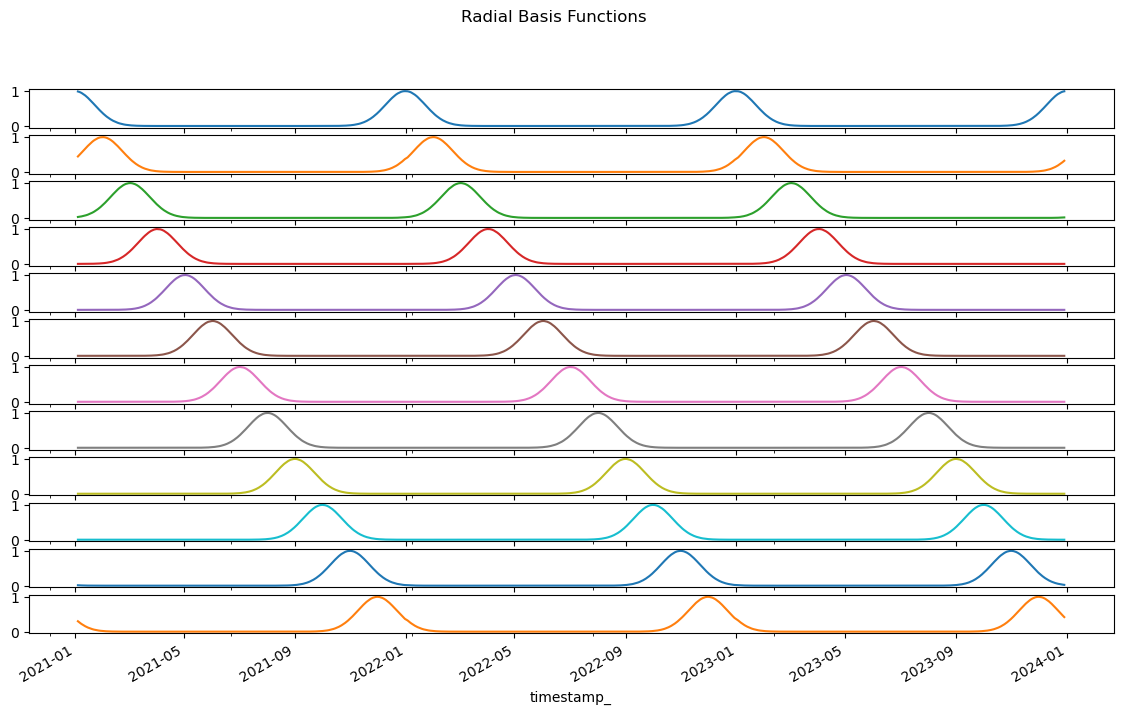

In [46]:
month_train.plot(subplots=True, figsize=(14, 8),
     	sharex=True, title="Radial Basis Functions",
     	legend=False);

In [47]:
month_train.idxmax()

rbf_0    2021-12-31
rbf_1    2022-01-31
rbf_2    2021-03-03
rbf_3    2021-04-01
rbf_4    2022-05-02
rbf_5    2021-06-02
rbf_6    2021-07-02
rbf_7    2022-08-01
rbf_8    2021-09-01
rbf_9    2021-10-01
rbf_10   2022-10-31
rbf_11   2021-12-01
dtype: datetime64[ns]

In [48]:
rbf = RepeatingBasisFunction(n_periods=12,
                             column='day_of_year',
                             remainder='drop',
                             input_range=(1, 365))

rbf.fit(train_test[['day_of_year']]) ## Обучим пока на train_test в реализации я буду обучать на трейне

def transform_datetime(dataframe: pd.DataFrame, estimator: RepeatingBasisFunction) -> pd.DataFrame:
    data = dataframe.copy()
    data['day_of_year'] = data.index.day_of_year
    transformed_month = estimator.transform(data)
    transformed_month = pd.DataFrame(data=transformed_month, index=data.index,
                                     columns=[f'rbf_{month}' for month in np.arange(12)])
    data = pd.concat((data.drop('day_of_year', axis=1), transformed_month), axis=1)

    return data

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
class DateTimeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_periods: int = 12, input_range: tuple[int, int] = (1, 365)):
        super().__init__()
        self.n_periods = n_periods
        self.column = 'day_of_year'
        self.remainder = 'passthrough'
        self.input_range = input_range
        self.rbf_estimator = RepeatingBasisFunction(n_periods=self.n_periods, column=self.column,
                                                    input_range=self.input_range, remainder=self.remainder)

    
    @staticmethod
    def _make_day_of_year(dataframe: pd.DataFrame) -> pd.DataFrame:
        data = dataframe.copy()
        data['day_of_year'] = data.index.day_of_year
        return data
    
    def fit(self, X, y=None):
        assert isinstance(X.index, pd.DatetimeIndex), 'Index must be datetime'        
        self.X_ = X
        data = self._make_day_of_year(X)
        self.rbf_estimator.fit(data)
        return self
    
    def transform(self, X, y=None):
        assert isinstance(X.index, pd.DatetimeIndex), 'Index must be datetime'
        check_is_fitted(self)
        data = self._make_day_of_year(X)
        transformed_month = self.rbf_estimator.transform(data)
        return transformed_month
    
    def get_feature_names_out(self) -> list[str]:
        return ['rbf_{}'.format(i) for i in range(self.rbf_estimator.n_periods)] + self.X_.columns.to_list()
    


In [50]:
test.index.day_of_year

Index([ 99, 152,  11, 294, 118, 139, 118, 263, 342, 179,
       ...
       138, 315, 232, 207, 310, 262, 313, 117, 286, 292],
      dtype='int32', name='timestamp_', length=35003)

In [51]:
test2 = test.copy()
test2 = aggregation(test2)
test2 = calc_wma(test2)
dt_tranformer = DateTimeTransformer()
dt_tranformer.fit(test2)
dt_tranformer.transform(test2)
# dt_tranformer.get_feature_names_out()

array([[9.90266255e-01, 4.43978461e-01, 2.69390861e-02, ...,
        2.43400000e+02, 2.18218350e+07,            nan],
       [9.82761115e-01, 4.70644174e-01, 3.05034137e-02, ...,
        2.50966700e+02, 1.91120910e+07, 2.43400000e+02],
       [9.73195170e-01, 4.97828170e-01, 3.44643448e-02, ...,
        2.54576700e+02, 2.19274020e+07, 2.47183350e+02],
       ...,
       [9.82761115e-01, 2.77724554e-01, 1.06216413e-02, ...,
        2.62720000e+02, 1.39700460e+07, 2.52694915e+02],
       [9.90266255e-01, 2.98918707e-01, 1.22113941e-02, ...,
        2.54500000e+02, 2.65849210e+07, 2.53385880e+02],
       [9.95662135e-01, 3.21031692e-01, 1.40086040e-02, ...,
        2.48480000e+02, 2.09611410e+07, 2.53164273e+02]])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140010 entries, 2021-01-29 19:55:00 to 2021-10-01 04:00:00
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   open_    140010 non-null  float64
 1   high_    140010 non-null  float64
 2   low_     140010 non-null  float64
 3   close_   140010 non-null  float64
 4   volume_  140010 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 6.4 MB


In [53]:
from sklearn.compose import ColumnTransformer

### Стандартизация датасета

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-01-04 to 2023-12-29
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open_     753 non-null    float64
 1   high_     753 non-null    float64
 2   low_      753 non-null    float64
 3   close_    753 non-null    float64
 4   volume_   753 non-null    int64  
 5   EMA_c_14  752 non-null    float64
 6   WMA_c_14  752 non-null    float64
 7   RSI_c_14  747 non-null    float64
 8   MACD      752 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 58.8 KB


In [56]:
std_cols = ['volume_']
std_scl = StandardScaler()
std_scl.fit(train[std_cols])
train[[col + '_std' for col in std_cols]] = std_scl.transform(train[std_cols]) 
train.drop(std_cols, axis=1)
train.sample(10)

,open_,high_,low_,close_,volume_,EMA_c_14,WMA_c_14,RSI_c_14,MACD,volume__std
timestamp_,,,,,,,,,,
2021-01-07,256.3333,278.2400,255.7333,276.5000,64095783,249.999967,249.999967,NaN,0.000000,0.115653
2022-11-21,178.6000,179.6600,167.5400,167.8300,53749110,191.668539,186.453927,22.718289,-14.921840,-0.189050
2021-12-27,359.6633,372.3333,356.9051,364.0000,32621799,335.961584,329.876307,66.468194,-3.352906,-0.811237
2023-08-18,217.4800,228.6222,201.5868,218.8000,110298088,238.960960,234.907095,19.173249,-9.934658,1.476284
2021-05-19,188.5600,189.2833,181.6667,186.0033,58064880,205.026589,200.198449,24.067440,-11.487011,-0.061953
2022-09-09,291.8200,299.9500,289.9830,298.4000,28635698,286.152590,283.765238,63.751026,1.098699,-0.928625
2021-12-13,339.6767,341.1500,317.1400,318.3333,31457910,347.780316,345.779719,31.416722,-2.989288,-0.845512
2022-09-26,275.3300,284.0900,269.8000,276.4000,31515396,291.331578,293.847143,33.339630,0.659582,-0.843820
2021-01-21,286.0000,286.3300,280.3333,280.6633,27591579,272.904717,272.904717,70.625362,0.343476,-0.959374


In [57]:
norm_cols = ['open_', 'high_', 'low_', 'close_', 'EMA_c_14', 'WMA_c_14', 'RSI_c_14', 'MACD'] 
norm_scl = MinMaxScaler()
norm_scl.fit(train[norm_cols])
train[[norm_col + ('_norm') for norm_col in norm_cols]] = norm_scl.transform(train[norm_cols])
train.drop(norm_cols, axis=1)
train.sample(10)

,open_,high_,low_,close_,volume_,EMA_c_14,WMA_c_14,RSI_c_14,MACD,volume__std,open__norm,high__norm,low__norm,close__norm,EMA_c_14_norm,WMA_c_14_norm,RSI_c_14_norm,MACD_norm
timestamp_,,,,,,,,,,,,,,,,,,
2023-11-09,220.6000,221.4500,195.9579,208.2700,100590040,217.421652,213.160000,37.595893,-8.289751,1.190388,0.376312,0.354179,0.310207,0.337338,0.382845,0.364945,0.336781,0.272079
2022-01-27,310.4333,316.4600,274.3333,279.0000,54125469,323.366134,318.994098,22.545370,-13.081077,-0.177966,0.675713,0.668493,0.566783,0.572712,0.815038,0.764925,0.161684,0.196741
2021-07-12,219.0000,229.1667,218.9833,229.0033,38136342,219.607263,222.349005,67.502689,4.019819,-0.648837,0.370980,0.379707,0.385585,0.406334,0.391761,0.399674,0.684716,0.465633
2022-10-21,206.0800,215.0000,203.0600,214.5500,45417021,225.514488,216.620280,39.568476,-18.554131,-0.434425,0.327919,0.332841,0.333457,0.358236,0.415859,0.378023,0.359730,0.110684
2021-03-29,204.3433,207.3600,198.6733,202.6000,39578625,217.549909,216.489336,33.773329,-9.729794,-0.606362,0.322131,0.307566,0.319096,0.318469,0.383368,0.377528,0.292310,0.249436
2023-01-09,114.0300,123.4611,113.7500,119.5500,110846923,124.877669,117.040370,43.690202,-17.782746,1.492447,0.021130,0.030009,0.041085,0.042097,0.005318,0.001680,0.407682,0.122813
2022-03-15,256.0667,268.5233,251.6667,267.2833,29273187,275.369293,273.583986,43.119322,-9.721667,-0.909851,0.494518,0.509908,0.492580,0.533721,0.619239,0.593306,0.401041,0.249564
2023-03-09,179.2800,184.8600,169.6500,169.9000,108229139,190.310764,190.698000,28.482228,2.268422,1.415355,0.238599,0.233131,0.224083,0.209651,0.272248,0.280055,0.230753,0.438094
2022-07-28,273.3333,284.5633,272.1633,284.3333,41724390,258.772901,262.001641,76.797698,9.287234,-0.543171,0.552065,0.562972,0.559679,0.590460,0.551535,0.549533,0.792854,0.548457


### Оптимизации перед итоговым pipeline

In [58]:
def calc_techical_metrics(dataframe: pd.DataFrame, *args, **kwargs) -> pd.DataFrame:
    data = dataframe.copy()
    data = calc_wma(data, **kwargs['wma'])
    data = calc_ema(data, **kwargs['ema'])
    data = calc_rsi(data, **kwargs['rsi'])
    data = calc_macd(data, **kwargs['macd'])
    return data.dropna()

### Итоговый pipeline

In [59]:
from sklearn import set_config
# set_config(transform_output='default')

In [60]:
test

,open_,high_,low_,close_,volume_
timestamp_,,,,,
2021-04-09 07:00:00,228.0000,228.5300,228.0000,228.3067,9630
2022-06-01 08:05:00,252.8327,252.8333,252.4000,252.5363,10158
2021-01-11 14:55:00,274.5117,274.9500,273.8633,274.1833,602475
2021-10-21 13:05:00,297.7933,298.1667,297.7867,298.0467,232473
2022-04-28 15:50:00,293.4933,293.6667,292.4200,292.4200,960777
...,...,...,...,...,...
2023-09-19 10:40:00,262.3999,263.3900,262.3999,263.3300,1318347
2022-11-09 07:45:00,194.0500,194.1800,193.9200,194.1500,7766
2021-04-27 16:10:00,234.5033,234.5333,234.0667,234.3333,35679


In [61]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(transform_output='pandas')


std_cols = ['volume_']
norm_cols = ['open_', 'high_', 'low_', 'close_', 'EMA_c_14', 'WMA_c_14', 'RSI_c_14', 'MACD']

techical_metrics_params = {
    'wma': {
        'n': 14,
        '_key': 'close_'
        },
    'ema': {
        'n': 14,
        '_key': 'close_'
        },
    'rsi': {
        'n': 14,
        '_key': 'close_'
        },
    'macd': {
        'n_fast': 12,
        'n_slow': 26,
        '_key': 'close_'
        }
}
agg_params = {
    'key': 'D'
}   

scaling_transformer = ColumnTransformer([
    ('std_scaler', StandardScaler(), std_cols),
    ('mm_scaler', MinMaxScaler(), norm_cols)
    ], remainder='passthrough'
                                        )

preprocessing_pipeline = Pipeline([
    ('agregate_days', FunctionTransformer(aggregation, kw_args=agg_params)),
    ('metrics_append', FunctionTransformer(calc_techical_metrics, kw_args=techical_metrics_params)),
    ('date_transformer', DateTimeTransformer(n_periods=12, input_range=(1, 365))),
    ('scalling', scaling_transformer)
])

preprocessing_pipeline.fit(train)

c:\Users\eross\anaconda3\envs\exchange_model\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('agregate_days',
                 FunctionTransformer(func=<function aggregation at 0x00000171EEAAB250>,
                                     kw_args={'key': 'D'})),
                ('metrics_append',
                 FunctionTransformer(func=<function calc_techical_metrics at 0x000001718F079750>,
                                     kw_args={'ema': {'_key': 'close_',
                                                      'n': 14},
                                              'macd': {'_key': 'close_',
                                                       'n_fast': 12,
                                                       'n_slow': 26},
                                              'rsi': {'_key': 'close_',
                                                      'n': 14},
                                              'wma': {'_key': 'close_',
                                                      'n': 14}})),
                ('date_transformer', DateTimeTransformer()),
                ('scalling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['volume_']),
                                                 ('mm_scaler', MinMaxScaler(),
                                                  ['open_', 'high_', 'low_',
                                                   'close_', 'EMA_c_14',
                                                   'WMA_c_14', 'RSI_c_14',
                                                   'MACD'])]))])

In [62]:
transformed_df = preprocessing_pipeline.transform(test)
transformed_df

,std_scaler__volume_,mm_scaler__open_,mm_scaler__high_,mm_scaler__low_,mm_scaler__close_,mm_scaler__EMA_c_14,mm_scaler__WMA_c_14,mm_scaler__RSI_c_14,mm_scaler__MACD,remainder__rbf_0,...,remainder__rbf_2,remainder__rbf_3,remainder__rbf_4,remainder__rbf_5,remainder__rbf_6,remainder__rbf_7,remainder__rbf_8,remainder__rbf_9,remainder__rbf_10,remainder__rbf_11
timestamp_,,,,,,,,,,,,,,,,,,,,,
2021-01-12,-1.269270,0.561119,0.575444,0.570275,0.588796,0.575426,0.559464,0.758284,0.402426,0.876774,...,0.068498,0.000953,1.795177e-06,4.575512e-10,1.578277e-14,3.240497e-13,5.423065e-09,0.000012,0.003765,0.156175
2021-01-13,-1.354784,0.590948,0.570471,0.579005,0.580532,0.586618,0.569833,0.804315,0.402426,0.855129,...,0.076224,0.001133,2.279242e-06,6.205227e-10,2.286315e-14,2.272907e-13,4.063025e-09,0.000010,0.003218,0.142600
2021-01-14,-1.308394,0.573328,0.573239,0.583151,0.583317,0.593745,0.576436,0.774452,0.402426,0.832208,...,0.084637,0.001344,2.887550e-06,8.397145e-10,3.304797e-14,1.590770e-13,3.037458e-09,0.000008,0.002745,0.129923
2021-01-15,-1.218718,0.585393,0.568828,0.562527,0.557182,0.599668,0.581923,0.777623,0.402426,0.808142,...,0.093774,0.001590,3.650268e-06,1.133866e-09,4.766609e-14,1.110937e-13,2.265828e-09,0.000006,0.002336,0.118115
2021-01-19,-1.385910,0.574995,0.554115,0.577717,0.579645,0.601202,0.583344,0.695456,0.402426,0.703188,...,0.138276,0.003053,9.121479e-06,3.688428e-09,2.018499e-13,2.585694e-14,6.865211e-10,0.000002,0.001200,0.078950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.918632,0.486196,0.475095,0.491608,0.485125,0.505537,0.501588,0.573277,0.486978,0.915731,...,0.005119,0.000019,9.598498e-09,6.543946e-13,7.472152e-15,2.471564e-10,1.106392e-06,0.000670,0.054956,0.609799
2023-12-26,-0.953778,0.487563,0.474796,0.495079,0.498968,0.510618,0.506797,0.628519,0.491227,0.973195,...,0.009219,0.000045,2.929491e-08,2.599967e-12,1.631709e-15,7.025996e-11,4.094343e-07,0.000323,0.034464,0.497828
2023-12-27,-1.354718,0.498795,0.538611,0.485592,0.518536,0.518221,0.514360,0.696022,0.500919,0.982761,...,0.010622,0.000055,3.851052e-08,3.650816e-12,1.109384e-15,5.102487e-11,3.176092e-07,0.000268,0.030503,0.470644


### Сохранение датасета

In [63]:
# pd.to_pickle(df, './data/df_TSLA_model.pkl')